In [ ]:
"""
	attempt at writing / adjusting the Bayes model to be able to infere biological parameters instead of distribution parameters

    free variables:
		* nu_bar: mean firingrate of the distribution
        * alpha_0: heterogeneity of the distribution
        * tau_A: AMPA time constant
        * tau_N: NMDA time constant
        * n: mixing parameter 
"""

In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path

root_dir = Path.cwd().parent
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))

from inference.BayesModel import BayesModel, run_sampling
from empirical.readData import ModelParams

from DM_theory.functions import get_nu_max, get_gamma, get_delta
from DM_theory.functions import get_nu_bar, get_alpha_0, get_tau_I


In [17]:
mP = ModelParams(
    mode="artificial",
    parameter={"gamma_1": 1.7, "delta_1": 4.5, "nu_max_1": 25.0},
    T=100,
    N=1000,
)
BM, results, sampler = run_sampling(mP, mode="dynesty", biological=True, nP=8)
# BM = BayesModel(mP)
# BM.prepare_data(mP, mode="rates")

input parameters: self.params[f'{key}_{m+1}']=1.7, self.params[f'{key}_{m+1}']=4.5, self.params[f'{key}_{m+1}']=25.0, 
inferred parameters: options['rateWnt']=[1.5959540910682242], options['tau_I']=[0.004052847345693511], options['alpha_0']=[array([[0.0346501]])]
running nested sampling


iter: 1998 | +100 | bound: 45 | nc: 1 | ncall: 83564 | eff(%):  2.514 | loglstar:   -inf < -4724.824 <    inf | logz: -4744.777 +/-  0.462 | dlogz:  0.008 >  1.000                                   

In [8]:
from inference.BayesModel import compare_results

# compare_results(sampler,mP,mode='dynesty')

use_dynesty = True
mean = {}
for i, key in enumerate(BM.paramNames):
    if use_dynesty:
        samp = results.samples[:, i]
        weights = results.importance_weights()

    else:
        samp = results["weighted_samples"]["points"][:, i]
        weights = results["weighted_samples"]["weights"]

    mean[key] = (samp * weights).sum()
    print(f"{key} mean: {mean[key]}")

mean["nu_max"] = get_nu_max(
    mean["nu_bar"],
    mean["tau_A"],
    mean["tau_N"],
    mean["r_N"],
)
mean["gamma"] = get_gamma(
    mean["nu_bar"],
    mean["alpha_0"],
    mean["tau_A"],
    mean["tau_N"],
    mean["r_N"],
)
mean["delta"] = get_delta(
    mean["nu_bar"],
    mean["alpha_0"],
    mean["tau_A"],
    mean["tau_N"],
    mean["r_N"],
)
print("\n")
for key in ["nu_max", "gamma", "delta"]:
    print(f"{key} mean: {mean[key]}")

nu_bar mean: 1.5938706507129665
alpha_0 mean: 0.0027364900819138783
tau_A mean: 0.005393043067183519
tau_N mean: 0.054155541286517464
r_N mean: 0.23381358109599493


nu_max mean: 19.50798962167722
gamma mean: 1.2596129437675854
delta mean: 3.419506504916508


data in:
gamma_1 = 1.7
delta_1 = 4.5
nu_max_1 = 25.0
nu_bar mean: 1.5938706507129665
alpha_0 mean: 0.0027364900819138783
tau_A mean: 0.005393043067183519
tau_N mean: 0.054155541286517464
r_N mean: 0.23381358109599493


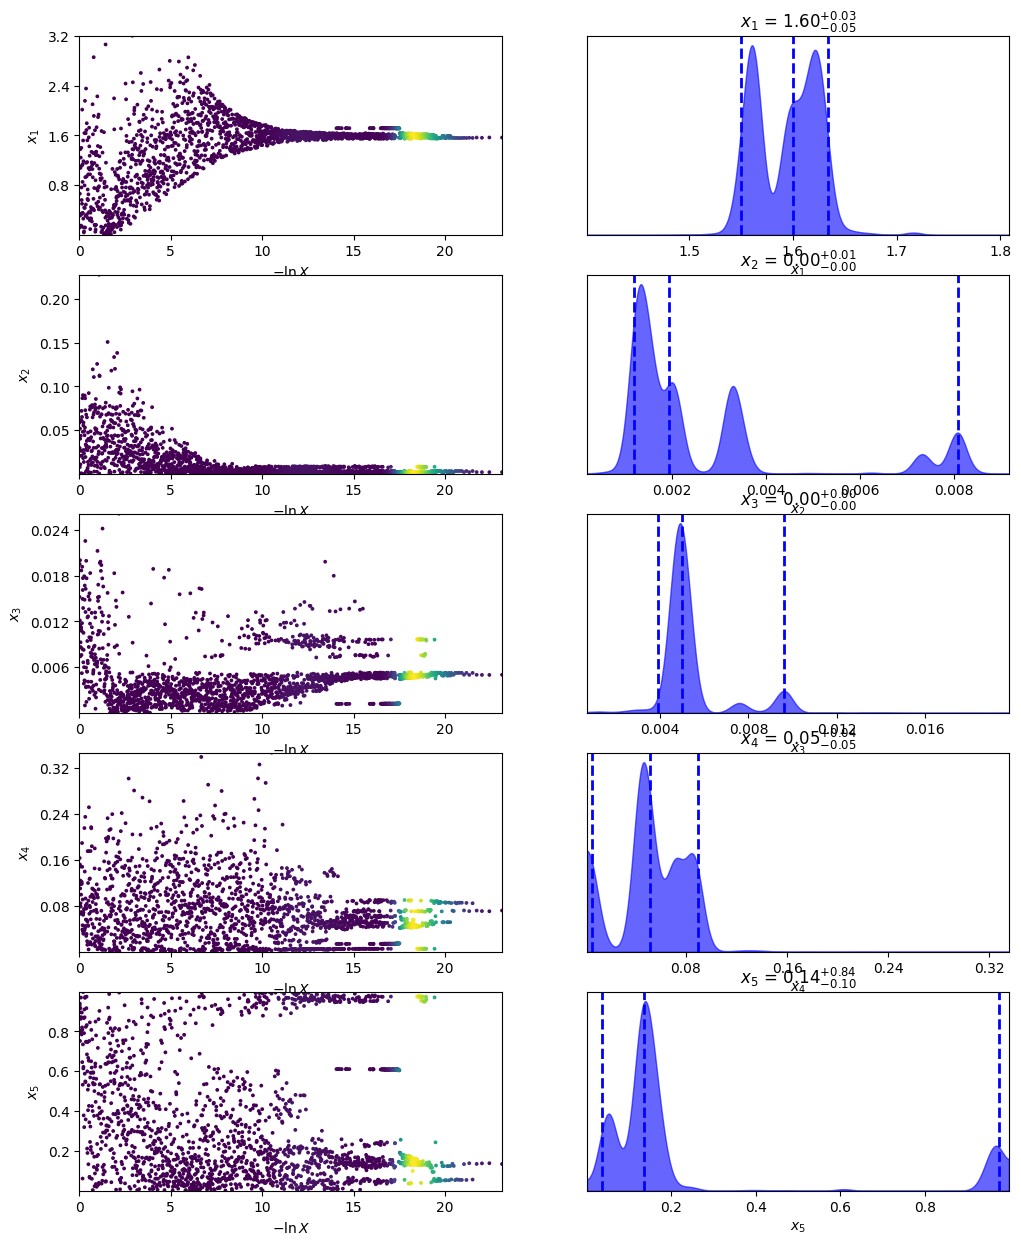

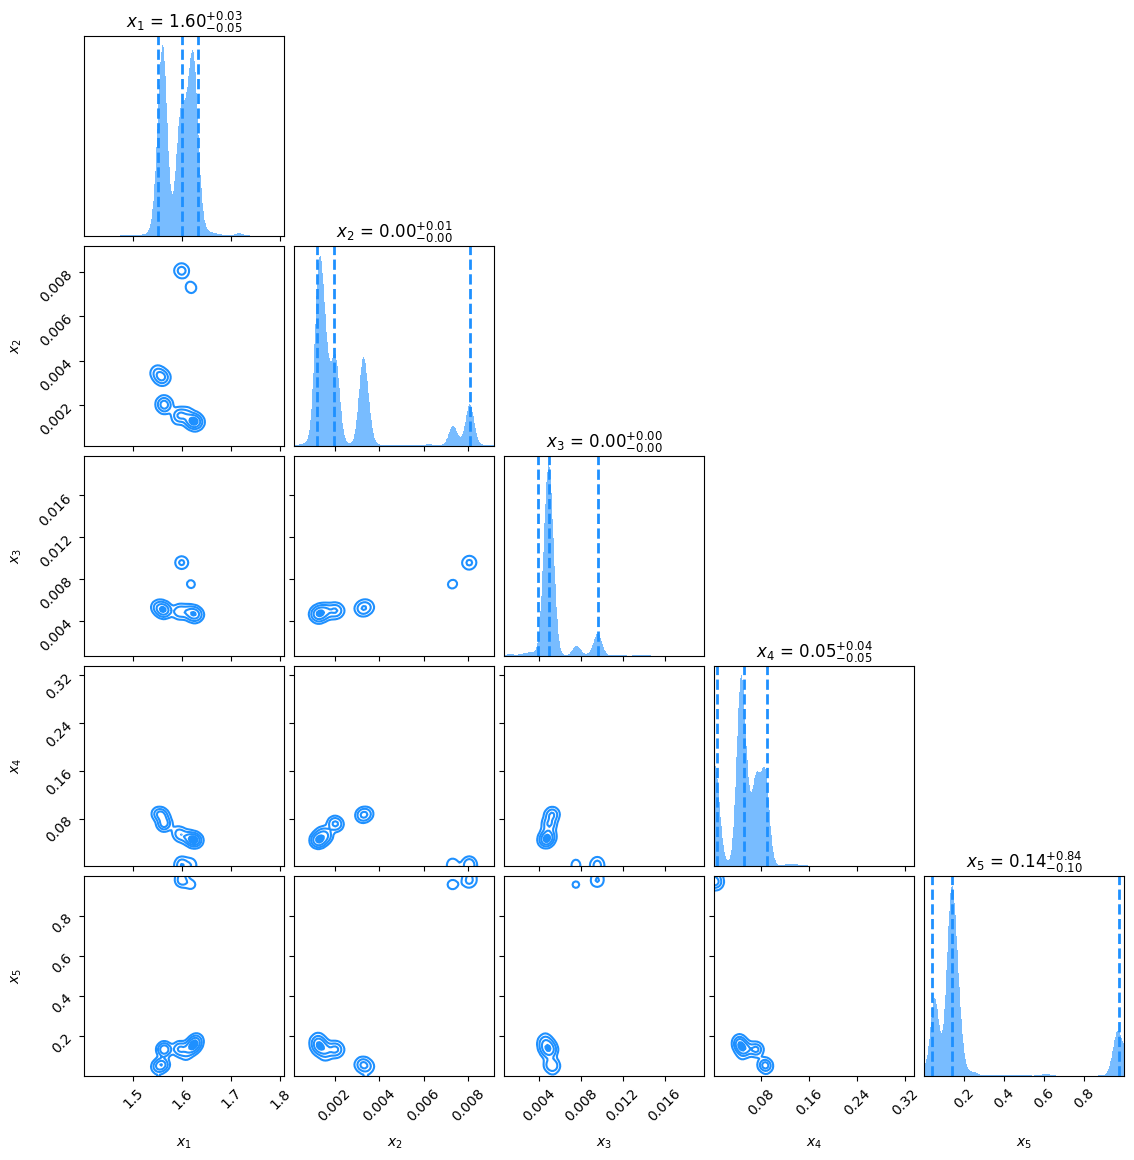


results {'nu_bar': 1.5938706507129665, 'alpha_0': 0.0027364900819138783, 'tau_A': 0.005393043067183519, 'tau_N': 0.054155541286517464, 'r_N': 0.23381358109599493}
self.two_pop=False


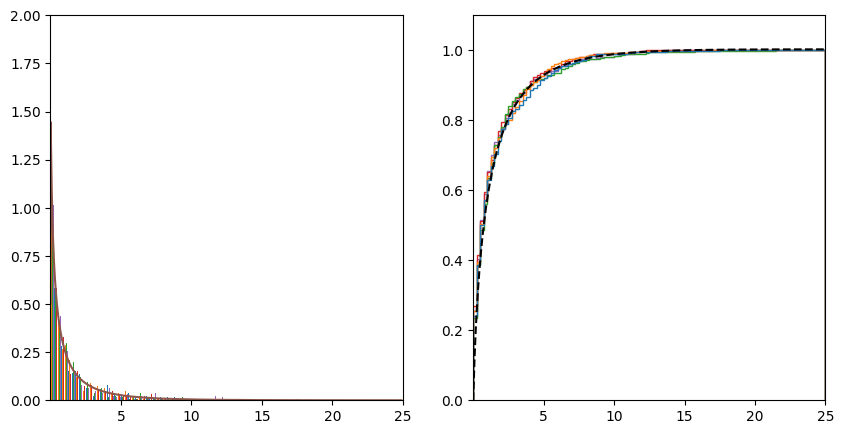

nu_bar_in=1.5959540910682242, nu_bar_out=1.5938706507129672
tau_I_in=0.004052847345693511, tau_I_out=0.006656029399245173
alpha_0_in=array([[0.0346501]]), alpha_0_out=array([[0.045212]])
nu_bar = 1.5938706507129665
alpha_0 = 0.0027364900819138783
tau_A = 0.005393043067183519
tau_N = 0.054155541286517464
r_N = 0.23381358109599493


In [15]:
compare_results(BM, sampler, mP, mode="dynesty", biological=True)

In [83]:
# import numpy as np


# p_animal = my_prior_trafo(np.random.rand(BM.nParams))
# print(p_animal)
# my_logl(p_animal)

[[0.46857377 0.00843435 0.01281902 0.12912236 0.82778875]]


-4528029377.286867

In [43]:
nu_bar = 1.2
alpha_0 = 0.01
tau_A = 0.002
tau_N = 0.2
r_N = 0.0

nu_max = get_nu_max(nu_bar, tau_A, tau_N, r_N)
gamma = get_gamma(nu_bar, alpha_0, tau_A, tau_N, r_N)
delta = get_delta(nu_bar, alpha_0, tau_A, tau_N, r_N)
print(f"{nu_max=}, {gamma=}, {delta=}")

nu_max=35.588127170858854, gamma=1.5415959062386932, delta=4.658845295487262
